# Az intercepció hatása a növényzet számára hasznosítható csapadék mértékének alakulására

Az erdei fák számára felvehető csapadék mértékét jelentősen befolyásolja az a vízmennyiség, amit a lombfelület megköt és újra elpárologtat anélkül, hogy az elérhetné a talajfelszínt. Hazai környezetben fenyő esetén a talajfelszínen található vastag száraz tűavar ezt a hatás jelentősen fokozhatja. Az élő lomb és a száraz avar együttes hatásaként visszatartott csapadékmennyiség elérheti az 5-10 mm mértéket, ami sok esetben a teljes csapadékesemény 30-50%-át is jelentheti.

<img src="https://github.com/jsheperd/forest_water/blob/master/img/csapadek.png?raw=true" width="300" height="300" />

### Hipotézis

A növényzet számára felvehető csapadék alakulását nem csak az éves csapadékösszeg befolyásolja, de az eloszlási mintázat is meghatározó. A modellezhetőség szempontjából a legfontosabb tényezők a lombfelület aktuális nagysága, valamint az adott csapdékesemény mértéke mm-ben. A felszíni elfolyást és a mélybeszivárgást első vizsgálatainkban nem vesszük figyelembe, mert azok modellezéséhez további domborzati és talajtani paraméterek is szükségesek.

### Felhasznált adatok

Az [Országos meteorológia Szolgálat 1901-2010 éghajalati adasorai](http://www.met.hu/eghajlat/magyarorszag_eghajlata/eghajlati_adatsorok/) napi csapdékeseményeket is tartalmaznak, ami alkalmas arra, hogy becsléseket tegyünk az aktuális csapadékesemény intercepciós veszteségére 110 éves időszakra vonatkozóan.

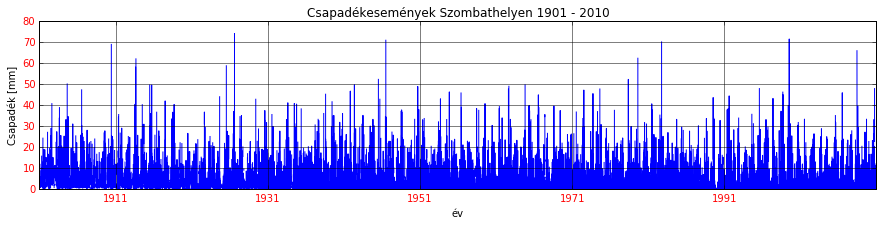

In [79]:
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt
import numpy as np


dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
szo_daily = pd.read_csv('https://raw.githubusercontent.com/jsheperd/forest_water/master/data/SZO_d.txt', 
                        sep=';',
                        parse_dates=['#datum'], 
                        date_parser=lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
                        )

szo_daily.set_index(szo_daily['#datum'])
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot('#datum', 'd_rs', data=szo_daily)
plt.ylabel(u'Csapadék [mm]')
plt.xlabel(u'év')
plt.title(u'Csapadékesemények Szombathelyen 1901 - 2010')

plt.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('r')
    label.set_fontsize('medium')


I = aktuális intercepció
C = benedvesedési kapacitás
P = csapadék nagysága


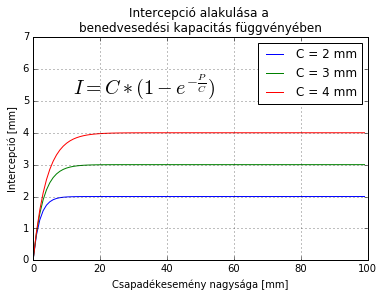

In [107]:
import math

# Intercepciós veszteség
def makeInterceptor(capacity):
    return lambda p: capacity*(1-math.exp(-p/capacity))

p = range(0, 100, 1)
c2 = map(makeInterceptor(2.0), p)
c3 = map(makeInterceptor(3.0), p)
c4 = map(makeInterceptor(4.0), p)

df = pd.DataFrame({'P': p, 'C2': c2, 'C3': c3, 'C4': c4})
#df['C'] = df['P'].apply(p10)
plt.plot(df['P'], df['C2'], label="C = 2 mm")
plt.plot(df['P'], df['C3'], label="C = 3 mm")
plt.plot(df['P'], df['C4'], label="C = 4 mm")
plt.legend()
plt.xlabel(u'Csapadékesemény nagysága [mm]')
plt.ylabel(u'Intercepció [mm]')
plt.gca().set_ylim([0,7])
plt.gca().annotate(r'$I = C*( 1 - e^{- \frac{P}{C}})$', xy=(12, 5.2), fontsize=20)
plt.grid(True)
plt.title(u'Intercepció alakulása a \nbenedvesedési kapacitás függvényében')
print u'I = aktuális intercepció'
print u'C = benedvesedési kapacitás'
print u'P = csapadék nagysága'



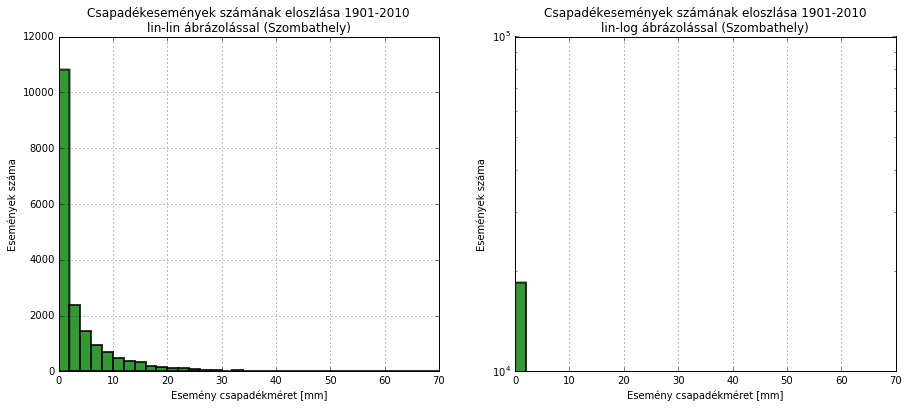

In [113]:
# Csapadékesemények száma
fig, ax = plt.subplots(figsize=(15,6))
plt.subplot(121)
plt.hist(x=szo_daily['d_rs'], bins=35, range=[0, 70], color='green', alpha=0.8, lw=2)
plt.title(u'Csapadékesemények számának eloszlása 1901-2010\nlin-lin ábrázolással (Szombathely)')
plt.ylabel(u'Események száma')
plt.xlabel(u'Esemény csapadékméret [mm]')
plt.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('r')
    label.set_fontsize('medium')


plt.subplot(122)
plt.yscale('log')
plt.hist(x=szo_daily['d_rs'], bins=35, range=[0, 70], color='green', alpha=0.8, lw=2)
plt.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('r')
    label.set_fontsize('medium')


plt.title(u'Csapadékesemények számának eloszlása 1901-2010\nlin-log ábrázolással (Szombathely)')
plt.ylabel(u'Események száma')
plt.xlabel(u'Esemény csapadékméret [mm]')

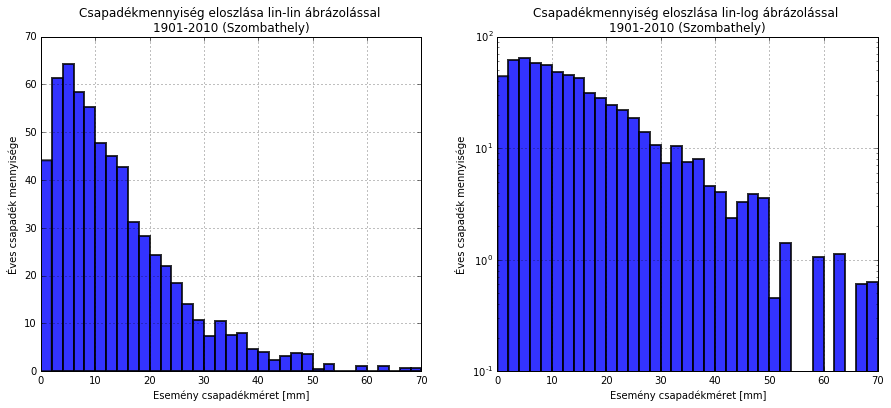

In [119]:
# Csapadékesemények mennyiségi összegzése
fig, ax = plt.subplots(figsize=(15,6))
plt.subplot(121)
plt.hist(x=szo_daily['d_rs'], bins=35, range=[0, 70], color='blue', 
         alpha=0.8, lw=2, weights=szo_daily['d_rs']/110.0)
plt.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('r')
    label.set_fontsize('medium')


plt.title(u'Csapadékmennyiség eloszlása lin-lin ábrázolással \n1901-2010 (Szombathely)')
plt.ylabel(u'Éves csapadék mennyisége')
plt.xlabel(u'Esemény csapadékméret [mm]')
plt.subplot(122)
plt.yscale('log')

plt.hist(x=szo_daily['d_rs'], bins=35, range=[0, 70], color='blue', 
         alpha=0.8, lw=2, weights=szo_daily['d_rs']/110.0)
plt.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('r')
    label.set_fontsize('medium')

plt.title(u'Csapadékmennyiség eloszlása lin-log ábrázolással \n1901-2010 (Szombathely)')
plt.ylabel(u'Éves csapadék mennyisége')
plt.xlabel(u'Esemény csapadékméret [mm]')

In [83]:
# intercepciós veszteség számítása eseményenként
szo_daily['c2'] = map(makeInterceptor(2.0), szo_daily['d_rs'])
szo_daily['c4'] = map(makeInterceptor(4.0), szo_daily['d_rs'])
szo_daily['c6'] = map(makeInterceptor(6.0), szo_daily['d_rs'])

# hasznosítható csapadék
szo_daily['h2'] = szo_daily['d_rs'] - szo_daily['c2']
szo_daily['h4'] = szo_daily['d_rs'] - szo_daily['c4']
szo_daily['h6'] = szo_daily['d_rs'] - szo_daily['c6']




szo_daily['Year'] = map(lambda d: d.year, szo_daily['#datum'])
szo_daily['Decad'] = map(lambda d: 1+((d.year-1)/10)*10, szo_daily['#datum'])

szo_daily['Month'] = map(lambda d: d.month, szo_daily['#datum'])
szo_daily['Vegetation'] = map(lambda d: ((5<=d.month) & (d.month<=10)), szo_daily['#datum'])

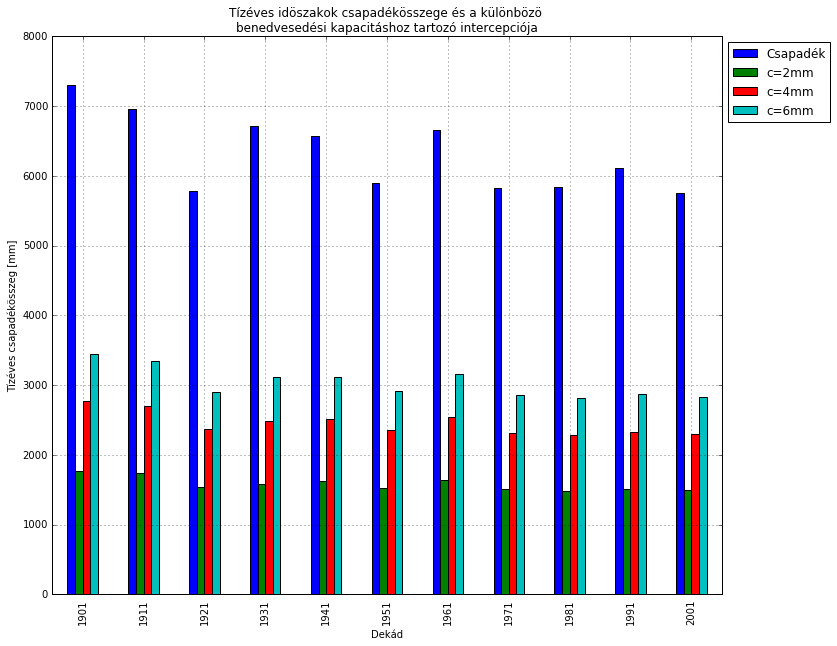

In [95]:
#Teljes évek
szo_daily.groupby(['Decad'])['d_rs', 'c2', 'c4', 'c6'].sum().plot(kind='bar', figsize=(12, 10))
plt.title(u'Tízéves idöszakok csapadékösszege és a különbözö \nbenedvesedési kapacitáshoz tartozó intercepciója')
plt.xlabel(u'Dekád')
plt.ylabel(u'Tízéves csapadékösszeg [mm]')
plt.legend(loc="upper left", bbox_to_anchor=(1,1), labels=[u'Csapadék', 'c=2mm', 'c=4mm', 'c=6mm'])
plt.grid(True)

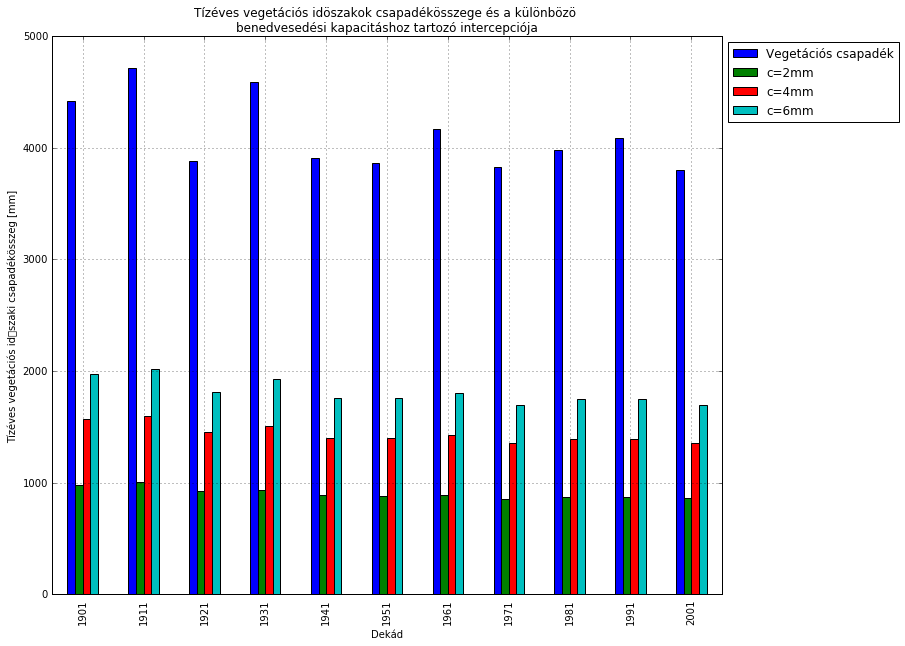

In [94]:
#Csak a vegetációs időszak
szo_daily[szo_daily['Vegetation']].groupby(['Decad'])['d_rs', 'c2', 'c4', 'c6'].sum().plot(kind='bar', figsize=(12, 10))
plt.title(u'Tízéves vegetációs idöszakok csapadékösszege és a különbözö \nbenedvesedési kapacitáshoz tartozó intercepciója')
plt.xlabel(u'Dekád')
plt.ylabel(u'Tízéves vegetációs időszaki csapadékösszeg [mm]')
plt.legend(loc="upper left", bbox_to_anchor=(1,1), labels=[u'Vegetációs csapadék', 'c=2mm', 'c=4mm', 'c=6mm'])
plt.grid(True)


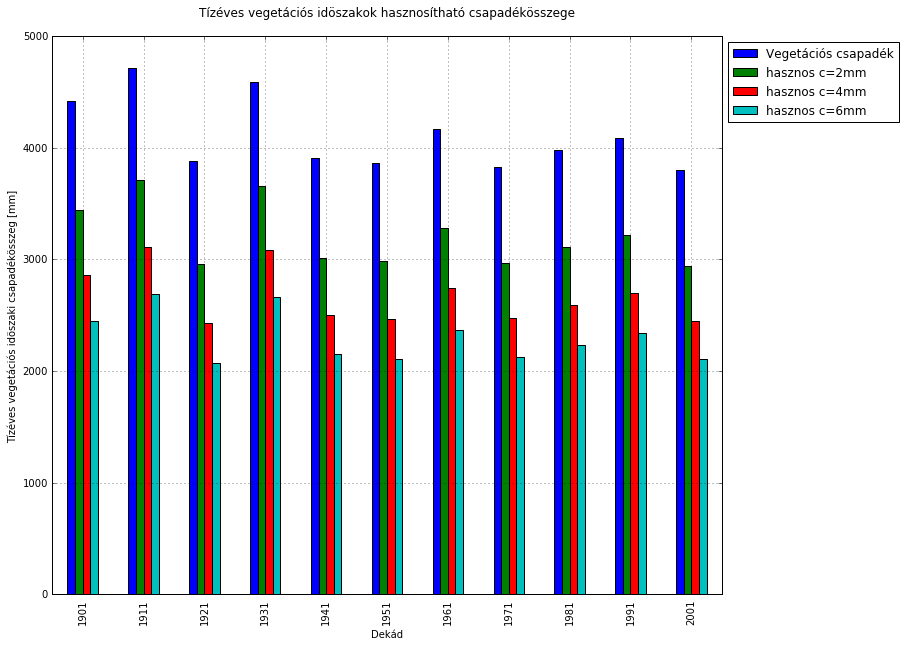

In [96]:
#Csak a vegetációs időszak
szo_daily[szo_daily['Vegetation']].groupby(['Decad'])['d_rs', 'h2', 'h4', 'h6'].sum().plot(kind='bar', figsize=(12, 10))
plt.title(u'Tízéves vegetációs idöszakok hasznosítható csapadékösszege\n ')
plt.xlabel(u'Dekád')
plt.ylabel(u'Tízéves vegetációs idöszaki csapadékösszeg [mm]')
plt.legend(loc="upper left", bbox_to_anchor=(1,1), labels=[u'Vegetációs csapadék', 'hasznos c=2mm', 'hasznos c=4mm', 'hasznos c=6mm'])
plt.grid(True)
